In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IFarmProject
Question: What crops and countries cause the most pollution? What is driving these countries to have a high nitrogen surplus? What can be done to decrease the nitrogen usage?




In [2]:
# iFarmData
scipy.io.loadmat('data/iFarmData')
data = scipy.io.loadmat('data/iFarmData')
#print(data)

In [3]:
sorted(data.keys())
#data['FAOSTAT_CoName_FAO']

['AreaH_FAO',
 'Co_ID_group_X',
 'FAOSTAT_CoCODE_FAO',
 'FAOSTAT_CoName_FAO',
 'FAOSTAT_CrCODE_FAO',
 'FAOSTAT_CrName_FAO',
 'GDPPCAP_WB',
 'NC_Bou',
 'NUE_3d',
 'Ndep_kgkm',
 'Nexc_kgkm',
 'Nfer_kgkm',
 'NfixR_kgkm_HDF',
 'Nfix_kgkm',
 'Nman_kgkm',
 'Nyield_kgkm',
 'Popu_FAO',
 'Popu_rural_FAO',
 'Pr_Crop_US',
 'Yield_FAO',
 'Yr',
 '__globals__',
 '__header__',
 '__version__',
 'cr_group_com',
 'netImTrade',
 'netImTradeVal']

# Finding the Most Nitrogen Polluting Country

In [4]:
N_sur = data['Nexc_kgkm']

yr2015 = int(np.where(data['Yr'][0] == 2015)[0])
yr1961 = int(np.where(data['Yr'][0] == 1961)[0])


mexico = int(np.where(data['FAOSTAT_CoName_FAO'] == 'Mexico')[0])
US = int(np.where(data['FAOSTAT_CoName_FAO'] == 'United States of America')[0])
china = int(np.where(data['FAOSTAT_CoName_FAO'] == 'China')[0])
PRico = int(np.where(data['FAOSTAT_CoName_FAO'] == 'Puerto Rico')[0])


In [5]:
for i in range(170):
    if np.isfinite(N_sur[mexico][i][yr2015]):
        print(N_sur[mexico][i][yr2015])
        
        

-581.3105519450423
14837.738849607278
16277.565849607277
16129.470849607276
15544.47324960728
12652.746849607276
14961.62578294061
14446.354849607276
13543.162849607279
677.1693353542607
3395.7894480549585
3571.4334480549587
14841.914849607276
15956.001249607278
3395.789448054957
4740.95614960728
2039.76133535426
12877.436449607276
13116.678049607277
1576.2342480549573
1600.286946436278
12118.660849607277
3075.28133535426
16231.244449607277
3395.789448054956
14423.810849607275
13981.295649607277
15948.934849607276
3092.6214480549575
2311.58445754739
3091.127048054958
10396.046849607277
15116.506849607278
7036.148449607276
16235.575649607275
16264.474849607277
16012.666849607278
7426.386849607278
5528.566049607278
12307.840849607277
12895.96084960728
4045.802057547389
2587.50205754739
13299.898849607276
3395.789448054957
14201.872849607278
3395.7894480549567
11979.284449607278
2219.3060575473896
13361.594295738714
12146.795849607277
16158.378849607278
2865.2772575473896
3422.41733535425

# Nitrogen Content in each crop (shown by crop code)

<Figure size 360x360 with 0 Axes>

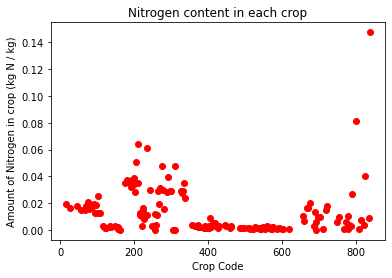

<Figure size 360x360 with 0 Axes>

In [6]:
#NC_Bou --> cr
#FAOSTAT_CrCODE_FAO --> cr

NC = data['NC_Bou']
NC = NC.reshape(170,1)
#print((NC.shape))
#print(type(NC))

cr = data['FAOSTAT_CrCODE_FAO']
#print(len(cr))


# The amount on Nitrogen in each crop
plt.scatter(cr,NC, color = 'Red')
plt.title('Nitrogen content in each crop')
plt.xlabel('Crop Code')
plt.ylabel('Amount of Nitrogen in crop (kg N / kg)')
plt.figure(figsize=(5,5))

Plot shows the amount of Nitrogen contained in each crop

# Most polluting crops by crop id

In [7]:
# Top 10 most polluting crops

m = NC[NC > 0.038]
#print(m)

cr_nc = pd.DataFrame(np.hstack((NC,cr)), columns = ['Nitrogen Content', 'Crop Id'])
#cr_nc

cr_nc[cr_nc['Nitrogen Content'] > 0.038]

,Nitrogen Content,Crop Id
0,0.08100,800.0
63,0.14750,839.0
72,0.04800,311.0
79,0.03872,201.0
82,0.06400,210.0
92,0.03984,292.0
142,0.06080,236.0
157,0.04000,826.0
160,0.04800,275.0
163,0.05040,205.0


Top 10 crops(by Crop ID) that pollute the most nitrogen 

# Matching crop id to crop name

In [8]:
# Names of the top 10 most polluting crops
cr_code = data['FAOSTAT_CrCODE_FAO']
cr_name = data['FAOSTAT_CrName_FAO']

nameAndId = pd.DataFrame(np.hstack((cr_name,cr_code)), columns = ['Crop Name', 'Crop Id'])

nameAndId[(nameAndId['Crop Id'] == 800) | (nameAndId['Crop Id'] == 839) | (nameAndId['Crop Id'] == 311) | (nameAndId['Crop Id'] == 201)
         | (nameAndId['Crop Id'] == 210) | (nameAndId['Crop Id'] == 292) | (nameAndId['Crop Id'] == 236) | (nameAndId['Crop Id'] == 826)
         | (nameAndId['Crop Id'] == 275) | (nameAndId['Crop Id'] == 205)]

,Crop Name,Crop Id
0,[Agave Fibres Nes],800
63,[Gums Natural],839
72,[Kapokseed in Shell],311
79,[Lentils],201
82,[Lupins],210
92,[Mustard seed],292
142,[Soybeans],236
157,[Tobacco; unmanufactured],826
160,[Tung Nuts],275
163,[Vetches],205


Listed above is the top 10 most polluting crops 

# Top 10 most polluting crops
Agave Fibres Nes (800) ---> 0.081 \
Gums Natural (839) ---> 0.14750 \
Kapokseed in Shell (311) ---> 0.048 \
Lentils (201) ---> 0.03872 \
Lupins (210) ---> 0.064 \
Mustard seed (292) ---> 0.03984 \
Soybeans (236) ---> 0.0608 \
Tobacco; unmanufactured (826) ---> 0.04 \
Tung Nuts (275) ---> 0.048 \
Vetches (205) ---> 0.0504

# Tracing back crops to the country they are grown

In [9]:
c_code = data['FAOSTAT_CoCODE_FAO']
c_name = data['FAOSTAT_CoName_FAO']

countryAndId = pd.DataFrame(np.hstack((c_name,c_code)), columns = ['Country Name', 'Country Id'])
#countryAndId
c_name[57]

array([array(['Ecuador'], dtype='<U7')], dtype=object)

In [10]:
# use Nyield_kgkm possibly

# country,crop,year
N_content = data['Nyield_kgkm']
N_sur = data['Nexc_kgkm'] #kg N / km^2

# Gathering each crops index
agave = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Agave Fibres Nes')[0])
gums = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Gums Natural')[0])
kapo = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Kapokseed in Shell')[0])
lentils = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Lentils')[0])
lupins = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Lupins')[0])
mustard = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Mustard seed')[0])
soybean = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Soybeans')[0])
tobacco = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Tobacco; unmanufactured')[0])
tung = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Tung Nuts')[0])
vetches = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Vetches')[0])

# A given year(first year vs. last year)
yr1961 = int(np.where(data['Yr'][0] == 1961)[0])
yr2015 = int(np.where(data['Yr'][0] == 2015)[0])

#Lenght of country name is 218
a = 218
#Length of crop name is 170
b = 170

In [11]:
# Used to find the index of the country that produces the crops we want to look at
# !!! Hopefully we find an easier way to do this !!!

#for i in range(218):
    #if np.isfinite(N_content[i][agave][yr1961]):
        #print(f'Index of country ---> {i}')
        #print(f'Amount of Nitrogen in Crop yield for given crop ---> {N_content[i][vetches][yr2015]}')

# Plotting Nitrogen Content for each crop (1961 vs 2015)

In [12]:
country = data['FAOSTAT_CoName_FAO']
len(country)

218

In [13]:
for i in range(218):
    if np.isfinite(N_sur[i][kapo][yr2015]):
        print(N_sur[i][kapo][yr2015])

## Fibres Agave Nes

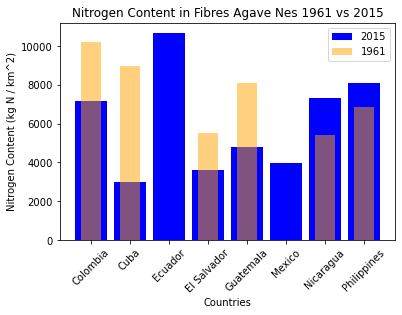

In [14]:
for i in range(218):
    if np.isfinite(N_content[i][agave][yr2015]):
        #print(N_content[i][agave][yr1961])
        x = country[i][0][0]
        y = N_content[i][agave][yr2015]
        y2 = N_content[i][agave][yr1961]
        
       # x_tick = range(len(x))
        plt.title('Nitrogen Content in Fibres Agave Nes 1961 vs 2015')
        plt.xlabel('Countries')
        plt.ylabel('Nitrogen Content (kg N / km^2)')
        plt.xticks(rotation = 45)
        
        plt.rcParams['figure.figsize'] = [5, 10]
        
        
        plt.bar(x,y, color = 'blue', label = '2015')
        plt.bar(x,y2, color = 'orange', alpha = 0.5, width = 0.5, label = '1961')
       
        plt.legend(['2015', '1961']) 

In [15]:
#for i in range(218):
#    if np.isfinite(N_content[i][agave][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][agave][yr2015]
        
#        plt.title('Nitrogen Content in Fibres Agave Nes (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axhline(y = 10200.33, color = 'red')
#        plt.xticks(rotation = 45)
#        plt.rcParams['figure.figsize'] = [5, 7]
            
#        plt.bar(x, y)

## Lentils

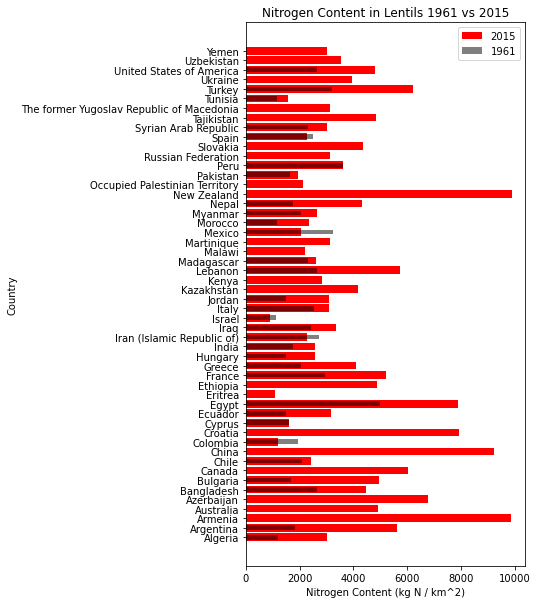

In [16]:
for i in range(218):
    if np.isfinite(N_content[i][lentils][yr2015]):
        #print(N_content[i][lentils][yr1961])
        x = country[i][0][0]
        y = N_content[i][lentils][yr2015]
        y2 = N_content[i][lentils][yr1961]
        
        plt.title('Nitrogen Content in Lentils 1961 vs 2015')
        plt.xlabel('Nitrogen Content (kg N / km^2)')
        plt.ylabel('Country')
        
        #plt.xticks(rotation = 70, size = 10)
        
        plt.rcParams['figure.figsize'] = [10, 13]
            
        plt.barh(x, y, color = 'red')
        plt.barh(x,y2, color = 'black', alpha = 0.5, height = 0.5)
        
        plt.legend(['2015', '1961'], loc = 'upper right')

In [17]:
#for i in range(218):
#    if np.isfinite(N_content[i][lentils][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][lentils][yr2015]
        
#        plt.title('Nitrogen Content in Lentils (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axhline(y = 5005.72, color = 'red')
#        plt.xticks(rotation = 70)
#        plt.rcParams['figure.figsize'] = [25, 5]
        
#        plt.bar(x, y, width = 0.4)

## Lupins

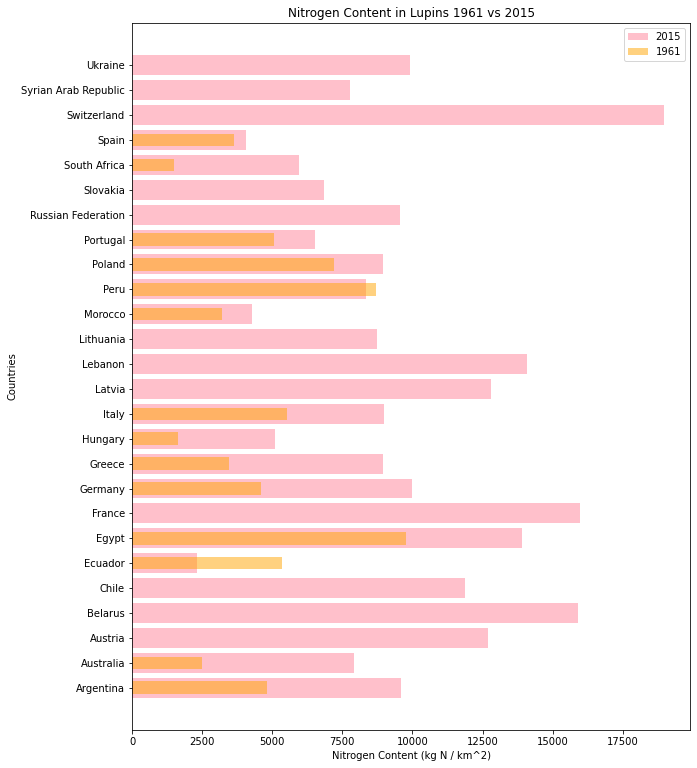

In [18]:
for i in range(218):
    if np.isfinite(N_content[i][lupins][yr2015]):
        #print(N_content[i][lupins][yr1961])
        x = country[i][0][0]
        y = N_content[i][lupins][yr2015]
        y2 = N_content[i][lupins][yr1961]
        
        plt.title('Nitrogen Content in Lupins 1961 vs 2015')
        plt.xlabel('Nitrogen Content (kg N / km^2)')
        plt.ylabel('Countries')
        
        plt.rcParams['figure.figsize'] = [8, 8]
        
        plt.barh(x, y, color = 'pink', label = '2015')
        plt.barh(x,y2, color = 'orange', alpha = 0.5, height = 0.5, label = '1961')
        
        plt.legend(['2015', '1961'], loc = 'upper right')

In [19]:
#for i in range(218):
#    if np.isfinite(N_content[i][lupins][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][lupins][yr2015]
        
#        plt.title('Nitrogen Content in Lupins (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axvline(x = 9769.6, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [5, 10]
        
#        plt.barh(x, y)

## Mustard seed

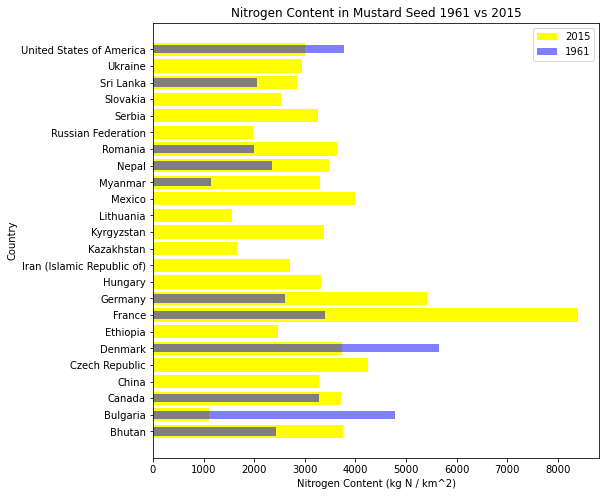

In [20]:
for i in range(218):
    if np.isfinite(N_content[i][mustard][yr2015]):
        #print(N_content[i][mustard][yr1961])
        x = country[i][0][0]
        y = N_content[i][mustard][yr2015]
        y2 = N_content[i][mustard][yr1961]
        
        plt.title('Nitrogen Content in Mustard Seed 1961 vs 2015')
        plt.xlabel('Nitrogen Content (kg N / km^2)')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [5, 10]
        
        plt.barh(x, y, color = 'yellow', label = '2015')
        plt.barh(x,y2, color = 'blue', alpha = 0.5, height = 0.5, label = '1961')
        
        plt.legend(['2015', '1961'], loc = 'upper right')

In [21]:
#for i in range(218):
#    if np.isfinite(N_content[i][mustard][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][mustard][yr2015]
        
#        plt.title('Nitrogen Content in Mustard Seed (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axvline(x = 6336.552, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [3, 10]
        
#       plt.barh(x, y)
        
    

## Soybeans

In [22]:
for i in range(218):
    if np.isfinite(N_content[i][soybean][yr1961]):
        print(f'Index {i} is {country[i][0][0]} ---> {N_content[i][soybean][yr1961]}')
        
print('============================================')

for i in range(218):
    if np.isfinite(N_content[i][soybean][yr2015]):
        print(f'Index {i} is {country[i][0][0]} ---> {N_content[i][soybean][yr2015]}')

Index 6 is Argentina ---> 5937.12
Index 8 is Australia ---> 4053.536
Index 25 is Brazil ---> 6851.552
Index 28 is Bulgaria ---> 3219.968
Index 30 is Burundi ---> 6080.0
Index 31 is Cambodia ---> 3984.832
Index 33 is Canada ---> 12788.064
Index 38 is Chile ---> 6080.0
Index 39 is China ---> 3806.08
Index 40 is Colombia ---> 9007.52
Index 51 is Democratic Peoples Republic of Korea ---> 3445.536
Index 52 is Democratic Republic of the Congo ---> 3587.2
Index 57 is Ecuador ---> 7600.0
Index 64 is Ethiopia PDR ---> 8685.888
Index 86 is Hungary ---> 1894.528
Index 88 is India ---> 2763.36
Index 89 is Indonesia ---> 4147.168
Index 90 is Iran (Islamic Republic of) ---> 6080.0
Index 94 is Italy ---> 11653.536
Index 96 is Japan ---> 8190.976
Index 103 is Lao Peoples Democratic Republic ---> 6141.408
Index 107 is Liberia ---> 2026.464
Index 114 is Malaysia ---> 2406.464
Index 122 is Mexico ---> 12068.8
Index 129 is Myanmar ---> 4026.0544
Index 132 is Nepal ---> 3040.0
Index 138 is Nigeria ---> 212

In [23]:
soyDataX = [country[8][0][0], country[25][0][0], country[33][0][0], country[39][0][0], country[88][0][0], country[94][0][0],
           country[122][0][0], country[149][0][0], country[179][0][0], country[196][0][0], country[206][0][0]]

soyDataY1961 = [N_content[8][soybean][yr1961], N_content[25][soybean][yr1961], N_content[33][soybean][yr1961],N_content[39][soybean][yr1961],
           N_content[88][soybean][yr1961], N_content[94][soybean][yr1961], N_content[122][soybean][yr1961], N_content[149][soybean][yr1961],
           N_content[179][soybean][yr1961], N_content[196][soybean][yr1961], N_content[206][soybean][yr1961]]

# ==========================================================================================================================================

soyDataY2015 = [N_content[8][soybean][yr2015], N_content[25][soybean][yr2015], N_content[33][soybean][yr2015],N_content[39][soybean][yr2015],
           N_content[88][soybean][yr2015], N_content[94][soybean][yr2015], N_content[122][soybean][yr2015], N_content[149][soybean][yr2015],
           N_content[179][soybean][yr2015], N_content[196][soybean][yr2015], N_content[206][soybean][yr2015]]

print(soyDataY1961)
print('==================')
print(soyDataY2015)

[4053.536, 6851.552, 12788.064, 3806.08, 2763.36, 11653.536, 12068.8, 5720.672, nan, 5948.064, 10275.2]
[12859.807999999999, 18413.888, 17627.744, 11012.704, 6914.885333333333, 21979.808, 8296.16, 6888.64, 18955.615999999998, 26751.392, 19631.712]


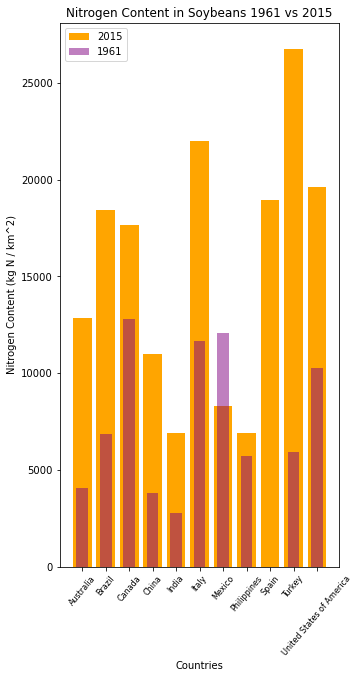

In [24]:
plt.title('Nitrogen Content in Soybeans 1961 vs 2015')
plt.xlabel('Countries')
plt.ylabel('Nitrogen Content (kg N / km^2)')

plt.rcParams['figure.figsize'] = [10, 8]

plt.xticks(rotation = 50, size = 8)
plt.bar(soyDataX, soyDataY2015, color = 'orange', label = '2015')
plt.bar(soyDataX, soyDataY1961, color = 'purple', alpha = 0.5, width = 0.5, label = '1961')

plt.legend()

In [25]:
#for i in range(218):
#    if np.isfinite(N_content[i][soybean][yr1961]):
        #print(N_content[i][soybean][yr1961])
#        x = country[i][0][0]
#        y = N_content[i][soybean][yr1961]
        
#        plt.title('Nitrogen Content in Soybeans (1961)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
        
#        plt.rcParams['figure.figsize'] = [11, 10]
        
#        plt.barh(x, y)

In [26]:
#for i in range(218):
#    if np.isfinite(N_content[i][soybean][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][soybean][yr2015]
        
#        plt.title('Nitrogen Content in Soybeans (2015)')
#        plt.xlabel('Country ID')
#        plt.ylabel('Nitrogen Content in Crop Yield')
#        plt.axvline(x = 12788.064, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [10,20]
        
        
#        plt.barh(x, y)

## Tobacco

In [27]:
tobaccoDataX = [country[8][0][0], country[25][0][0], country[33][0][0], country[39][0][0], country[88][0][0], country[94][0][0],
           country[122][0][0], country[149][0][0], country[179][0][0], country[196][0][0], country[206][0][0]]

tobaccoDataY1961 = [N_content[8][tobacco][yr1961], N_content[25][tobacco][yr1961], N_content[33][tobacco][yr1961],N_content[39][tobacco][yr1961],
           N_content[88][tobacco][yr1961], N_content[94][tobacco][yr1961], N_content[122][tobacco][yr1961], N_content[149][tobacco][yr1961],
           N_content[179][tobacco][yr1961], N_content[196][tobacco][yr1961], N_content[206][tobacco][yr1961]]

# ==========================================================================================================================================

tobaccoDataY2015 = [N_content[8][tobacco][yr2015], N_content[25][tobacco][yr2015], N_content[33][tobacco][yr2015],N_content[39][tobacco][yr2015],
           N_content[88][tobacco][yr2015], N_content[94][tobacco][yr2015], N_content[122][tobacco][yr2015], N_content[149][tobacco][yr2015],
           N_content[179][tobacco][yr2015], N_content[196][tobacco][yr2015], N_content[206][tobacco][yr2015]]


print(tobaccoDataY1961)
print('==================')
print(tobaccoDataY2015)

[5087.2, 2948.8, 6817.6, 4984.0, 3062.4, 5434.56, 5102.400000000001, 2634.4, 7040.0, 2884.4, 7873.6]
[10985.2, 8548.0, 11129.6, 8622.8, 6732.400000000001, 13530.4, 7794.0, 6791.6, 13094.4, 2833.6, 9810.800000000001]


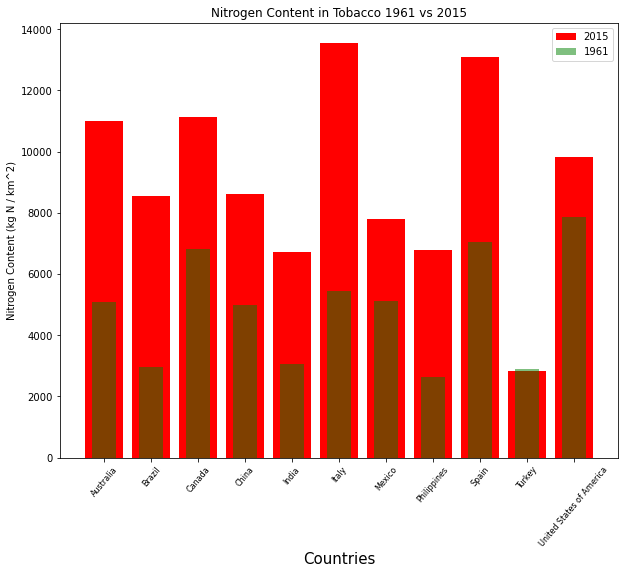

In [28]:
plt.title('Nitrogen Content in Tobacco 1961 vs 2015')
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Nitrogen Content (kg N / km^2)')

plt.rcParams['figure.figsize'] = [15, 15]

plt.xticks(rotation = 50, size = 8)
plt.bar(tobaccoDataX, tobaccoDataY2015, color = 'red', label = '2015')
plt.bar(tobaccoDataX, tobaccoDataY1961, color = 'green', alpha = 0.5, width = 0.5, label = '1961')

plt.legend()

In [29]:
for i in range(218):
    if np.isfinite(N_content[i][tobacco][yr1961]):
        print(f'Index {i} is {country[i][0][0]} --->{N_content[i][tobacco][yr1961]}')

Index 1 is Albania --->1119.6000000000001
Index 2 is Algeria --->2185.2000000000003
Index 3 is American Samoa --->4000.0
Index 4 is Angola --->1616.4
Index 6 is Argentina --->4208.8
Index 8 is Australia --->5087.2
Index 9 is Austria --->7624.0
Index 13 is Bangladesh --->2508.4
Index 17 is Belgium-Luxembourg --->10521.2
Index 19 is Benin --->1248.4
Index 22 is Bolivia (Plurinational State of) --->2666.8
Index 25 is Brazil --->2948.8
Index 28 is Bulgaria --->4019.28
Index 29 is Burkina Faso --->1555.6000000000001
Index 30 is Burundi --->2000.0
Index 31 is Cambodia --->2602.8
Index 32 is Cameroon --->2554.0
Index 33 is Canada --->6817.6
Index 36 is Central African Republic --->1636.4
Index 38 is Chile --->9159.2
Index 39 is China --->4984.0
Index 40 is Colombia --->8241.2
Index 42 is Congo --->1866.8
Index 44 is Costa Rica --->3845.2000000000003
Index 46 is Cuba --->3610.0
Index 47 is Cyprus --->1724.4
Index 49 is Czechoslovakia --->4358.0
Index 50 is C?te dIvoire --->1180.4
Index 51 is D

In [30]:
#for i in range(218):
#    if np.isfinite(N_content[i][tobacco][yr1961]):
        #print(N_content[i][tobacco][yr1961])
        #x = country[i][0][0]
#        x = i
#        y = N_content[i][tobacco][yr1961]
        
#        plt.title('Nitrogen Content in Tobacco (1961)')
#        plt.xlabel('Country ID')
#        plt.ylabel('Nitrogen Content')
        
#        plt.rcParams['figure.figsize'] = [20, 10]
        
#        plt.bar(x, y)

In [31]:
#for i in range(218):
#    if np.isfinite(N_content[i][tobacco][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
        #x = country[i][0][0]
#        x = i
#        y = N_content[i][tobacco][yr2015]
        
#        plt.title('Nitrogen Content in Tobacco (2015)')
#        plt.xlabel('Country ID')
#        plt.ylabel('Nitrogen Content')
#        plt.axhline(y = 10800.0, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [15, 10]
        
#        plt.bar(x, y)

## Tung Nuts

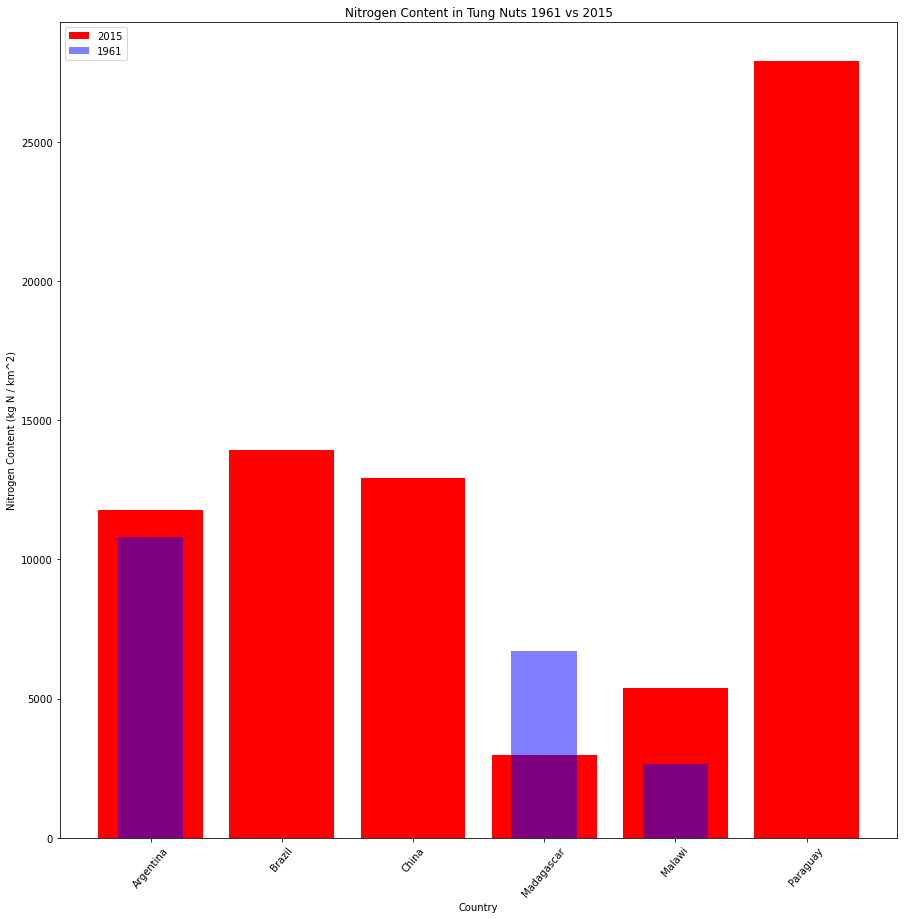

In [32]:
for i in range(218):
    if np.isfinite(N_content[i][tung][yr2015]):
        #print(N_content[i][tung][yr1961])
        x = country[i][0][0]
        y = N_content[i][tung][yr2015]
        y2 = N_content[i][tung][yr1961]
        
        plt.title('Nitrogen Content in Tung Nuts 1961 vs 2015')
        plt.xlabel('Country')
        plt.ylabel('Nitrogen Content (kg N / km^2)')
        
        plt.xticks(rotation = 50)
        
        plt.rcParams['figure.figsize'] = [10, 7]
        
        plt.bar(x, y, color = 'red')
        plt.bar(x, y2, color = 'blue', alpha = 0.5, width = 0.5)
        
        plt.legend(['2015', '1961'])

In [33]:
#for i in range(218):
#    if np.isfinite(N_content[i][tung][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][tung][yr2015]
        
#        plt.title('Nitrogen Content in Tung Nuts (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axvline(x = 10800.0, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [10, 10]
        
#        plt.barh(x, y)

## Vetches

In [34]:
for i in range(218):
    if np.isfinite(N_content[i][vetches][yr2015]):
        print(f'Index {i}')

Index 1
Index 2
Index 8
Index 9
Index 15
Index 23
Index 28
Index 45
Index 47
Index 48
Index 58
Index 61
Index 63
Index 76
Index 86
Index 91
Index 94
Index 97
Index 104
Index 105
Index 110
Index 117
Index 122
Index 127
Index 141
Index 150
Index 155
Index 157
Index 169
Index 174
Index 179
Index 186
Index 189
Index 195
Index 196
Index 201


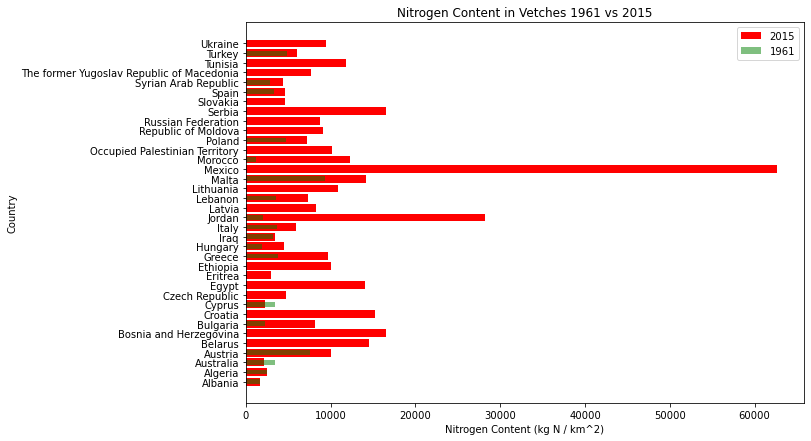

In [35]:
for i in range(218):
    if np.isfinite(N_content[i][vetches][yr2015]):
        #print(N_content[i][vetches][yr1961])
        x = country[i][0][0]
        y = N_content[i][vetches][yr2015]
        y2 = N_content[i][vetches][yr1961]
        
        plt.title('Nitrogen Content in Vetches 1961 vs 2015')
        plt.xlabel('Nitrogen Content (kg N / km^2)')
        plt.ylabel('Country')
        
        plt.rcParams['figure.figsize'] = [12, 10]
        
        plt.barh(x, y, color = 'red')
        plt.barh(x, y2, color = 'green', alpha = 0.5, height = 0.5)
        
        plt.legend(['2015', '1961'], loc = 'upper right')

In [36]:
#for i in range(218):
#    if np.isfinite(N_content[i][vetches][yr2015]):
        #print(data['FAOSTAT_CoName_FAO'][i][0][0])
#        x = country[i][0][0]
#        y = N_content[i][vetches][yr2015]
        
#        plt.title('Nitrogen Content in Vetches (2015)')
#        plt.xlabel('Nitrogen Content in Crop Yield')
#        plt.ylabel('Country')
#        plt.axvline(x = 15934.464, color = 'red')
        
#        plt.rcParams['figure.figsize'] = [8, 7]
        
#        plt.barh(x, y)

# Mexico Crop Data

In [37]:
# Collecting Country index for Mexico
mexico = int(np.where(data['FAOSTAT_CoName_FAO'] == 'Mexico')[0])
mexico

122

## Mexico Nitrogen Yield

In [38]:
# Accessing Nitrogen yield for every year and crop in Mexico
mexicoNyield = N_content[mexico, :, :]

#DataFrame of data for easier access
NyieldData = pd.DataFrame(mexicoNyield , columns = [np.arange(1961,2016)])
#df

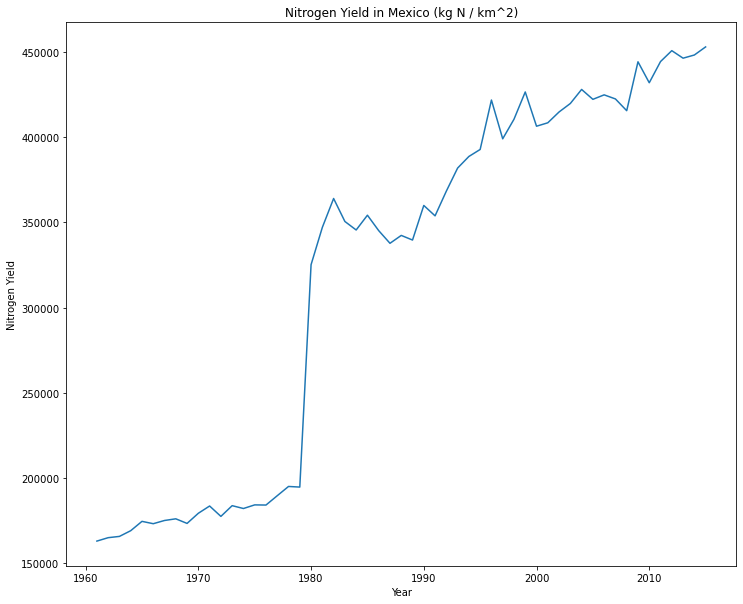

In [39]:
# Plot of Nitrogen Content of Mexico
Nx = np.arange(1961,2016)
Ny = NyieldData.sum(axis = 0)

plt.xlabel('Year')
plt.ylabel('Nitrogen Yield')
plt.title('Nitrogen Yield in Mexico (kg N / km^2)' )

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(Nx, Ny)

## Plot of crops in Mexico from top 10

In [40]:
# Finding Idx of top 10 crops 
#x = ['Agave', 'Lentils', 'Mustard seed', 'Soybeans', 'Tobacco', 'Vetches']
#y = [N_content[mexico][agave][yr2015], N_content[mexico][lentils][yr2015], N_content[mexico][mustard][yr2015], 
#    N_content[mexico][soybean][yr2015], N_content[mexico][tobacco][yr2015], N_content[mexico][vetches][yr2015]]
#y2 = [N_content[mexico][agave][yr1961], N_content[mexico][lentils][yr1961], N_content[mexico][mustard][yr1961], 
#    N_content[mexico][soybean][yr1961], N_content[mexico][tobacco][yr1961], N_content[mexico][vetches][yr1961]]

#plt.bar(x,y)
#plt.bar(x, y2, alpha = 0.5)

## Crop yield 

In [41]:
# Crop Yield 
agave_yld = data['Yield_FAO'][mexico][agave][yr2015]
lentils_yld = data['Yield_FAO'][mexico][lentils][yr2015]
mustard_yld = data['Yield_FAO'][mexico][mustard][yr2015]
soybean_yld = data['Yield_FAO'][mexico][soybean][yr2015]
tobacco_yld = data['Yield_FAO'][mexico][tobacco][yr2015]
vetches_yld = data['Yield_FAO'][mexico][vetches][yr2015]

print('Mexico produced:')
print('================')
print(f'Fibres Agave Nes : {agave_yld}(kg/km^2)')
print(f'Lentils : {lentils_yld}(kg/km^2)')
print(f'Mustard Seed : {mustard_yld}(kg/km^2)')
print(f'Soybeans : {soybean_yld}(kg/km^2)')
print(f'Tobacco : {tobacco_yld}(kg/km^2)')
print(f'Vetches : {vetches_yld}(kg/km^2)')

Mexico produced:
Fibres Agave Nes : 49100.0(kg/km^2)
Lentils : 52660.0(kg/km^2)
Mustard Seed : 100000.0(kg/km^2)
Soybeans : 136450.0(kg/km^2)
Tobacco : 194850.0(kg/km^2)
Vetches : 1243860.0(kg/km^2)


In [42]:
# Crop Yield Data
crop = data['Yield_FAO']

# Mexico Crop Data
MexicoCrop = crop[mexico,:,:]

#Convert to Pandas
cropData = pd.DataFrame(MexicoCrop , columns = [np.arange(1961,2016)])

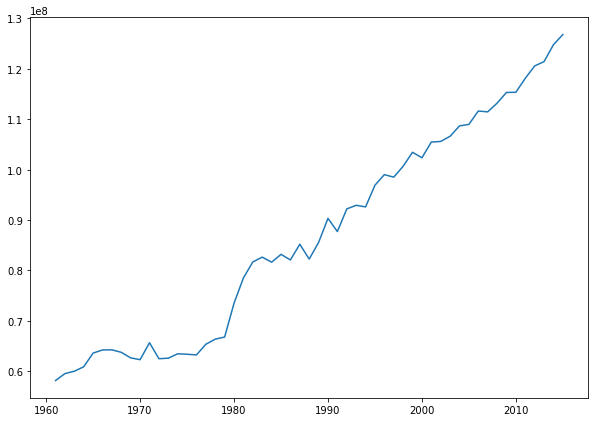

In [43]:
Cx = np.arange(1961,2016)
Cy = cropData.sum(axis = 0)

plt.plot(Cx,Cy)

## Fertilization

In [44]:
fert = data['Nfer_kgkm']# (co,cr,yr)

fertMexico = fert[mexico,:,:]
fertData = pd.DataFrame(fertMexico , columns = [np.arange(1961,2016)])

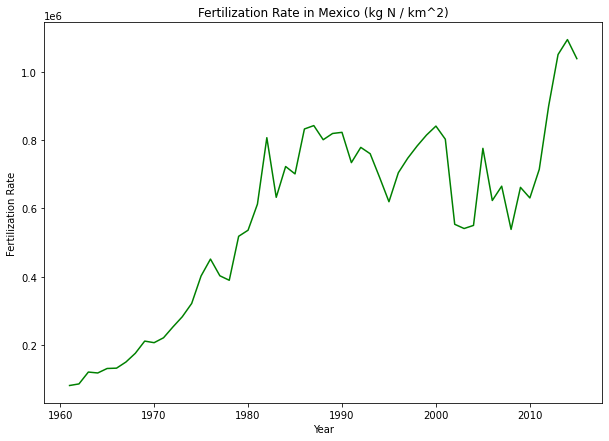

In [62]:
Fx = np.arange(1961,2016)
Fy = fertData.sum(axis = 0)

plt.xlabel('Year')
plt.ylabel('Fertilization Rate')
plt.title('Fertilization Rate in Mexico (kg N / km^2)')

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(Fx,Fy, color = 'green')

## Manure Application

In [46]:
# Manure application data
manure = data['Nman_kgkm']

# Mexioc Manure Application
MexManure = manure[mexico,:,:]

#Convert to Pandas
ManureApp = pd.DataFrame(MexManure , columns = [np.arange(1961,2016)])

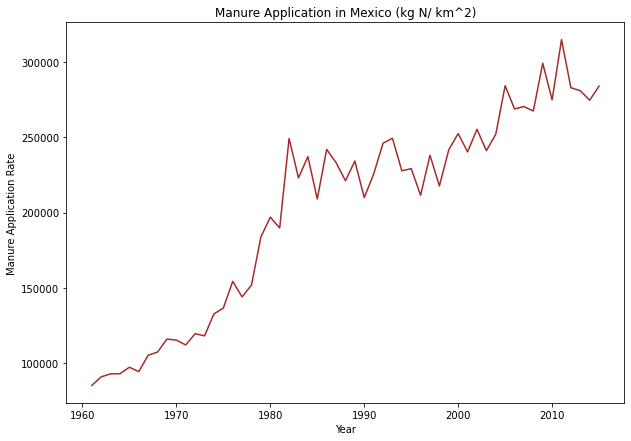

In [63]:
Mx = np.arange(1961,2016)
My = ManureApp.sum(axis = 0)

plt.xlabel('Year')
plt.ylabel('Manure Application Rate')
plt.title('Manure Application in Mexico (kg N/ km^2)')

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(Mx,My, color = 'brown')

## Nitrogen Fixation

In [48]:
# Nitrogen Fixation Data
Nfix = data['Nfix_kgkm']

# Nitrogen Fixation of Mexico Data
MexicoNfix = Nfix[mexico,:,:]

#Convert to Pandas
fixRate = pd.DataFrame(MexicoNfix , columns = [np.arange(1961,2016)])

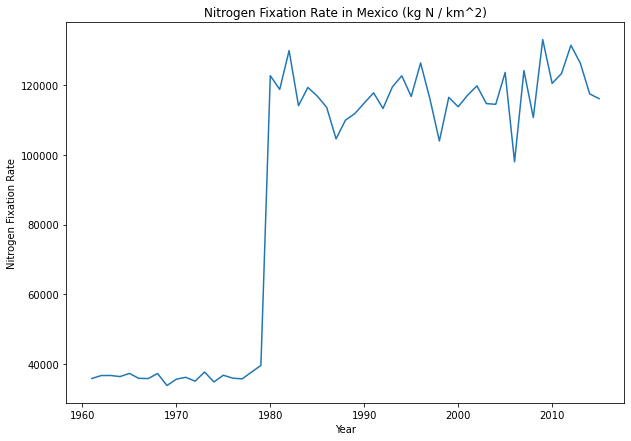

In [49]:
NFx = np.arange(1961,2016)
NFy = fixRate.sum(axis = 0)

plt.xlabel('Year')
plt.ylabel('Nitrogen Fixation Rate')
plt.title('Nitrogen Fixation Rate in Mexico (kg N / km^2)')

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(NFx,NFy)

In [50]:
cr_name[166]

array([array(['Wheat'], dtype='<U5')], dtype=object)

## Atmospheric Deposition Rate

In [51]:
# Deposition Data
Depo = data['Ndep_kgkm']

#Mexico Depo Rate
MexicoDepo = Depo[mexico,:,:]

#Convert to Pandas
DepoRate = pd.DataFrame(MexicoDepo , columns = [np.arange(1961,2016)])

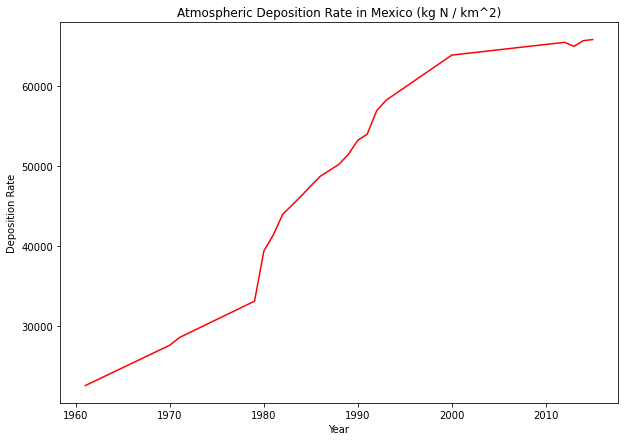

In [64]:
Dx = np.arange(1961,2016)
Dy = DepoRate.sum(axis = 0)

plt.xlabel('Year')
plt.ylabel('Deposition Rate')
plt.title('Atmospheric Deposition Rate in Mexico (kg N / km^2)')

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(Dx,Dy, color = 'red')

## All Nitrogen Factors

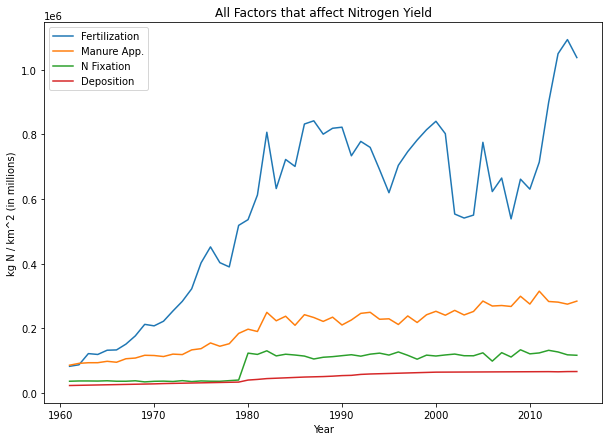

In [61]:
#plt.plot(Nx,Ny, label = 'Nitrogen Content')
#plt.plot(Cx,Cy, label = "Crop Yield")
plt.plot(Fx,Fy, label = 'Fertilization')
plt.plot(Mx,My, label = 'Manure App.')
plt.plot(NFx,NFy, label = 'N Fixation')
plt.plot(Dx,Dy, label = 'Deposition')

plt.rcParams['figure.figsize'] = [10, 7]

#plt.yticks(ticks = np.arange(0, 1.3e6))
plt.xlabel('Year')
plt.ylabel('kg N / km^2 (in millions)')
plt.title('All Factors that affect Nitrogen Yield')
plt.legend()
plt.show()

## Yaqui Valley

[ 1441.48445245  1522.81615678  2132.70543446  2085.71465528
  2315.99000065  2332.82084535  2648.39921312  3097.43305399
  3723.96048796  3642.64770732  3889.77861677  4445.05447436
  4970.88993141  5652.84392784  7063.93552066  7931.6858916
  7073.5975825   6843.00562231  9101.33414771  8499.10200868
  9414.92702264 12344.1532013   9533.23312084 10732.28471968
 10394.12712767 12164.982054   12310.26200255 11706.0323303
 11772.16720501 11495.87727637 10258.22843573 10720.90817841
 10325.93301236  9389.08787499  8418.40866157  9571.07815673
 10148.70783635 10634.52200137 11068.93765221 11424.68543802
 10902.36876628  7521.4764042   7353.47803218  7476.89856081
 10539.99387162  8466.9623433   9035.99861504  7318.11355807
  8989.31770103  8568.51302597  9704.50687968 12221.71232382
 14270.88295585 14669.72549317 13921.73169052]


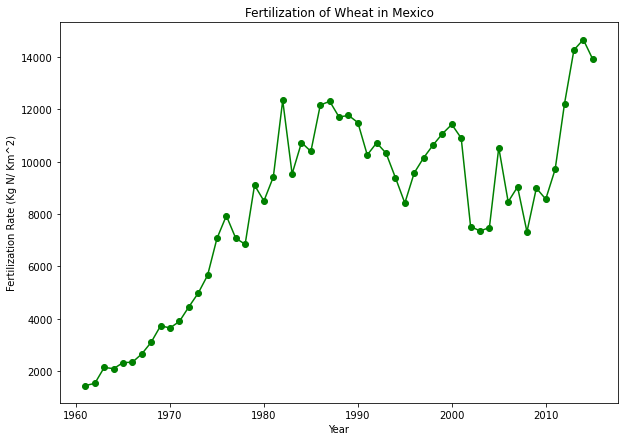

In [54]:
# FERTILIZATION OF WHEAT
wheat = int(np.where(data['FAOSTAT_CrName_FAO'] == 'Wheat')[0])

x = data['Yr'].reshape(55,1)
y = fert[mexico][wheat]

print(y)

plt.xlabel('Year')
plt.ylabel('Fertilization Rate (Kg N/ Km^2)')
plt.title('Fertilization of Wheat in Mexico')
plt.plot(x,y, 'o-', color = 'green')

$\large \frac{14669.73 kg N}{1 km^2} * \frac{1 km^2}{100 H} = \frac{146.7 kg N}{1 H}$

## Imports/Exports

In [55]:
# Show exports of Mexcio 2015
mexico

122

In [56]:
data['netImTrade'][:,:,:,mexico].sum(axis=2)

array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,   12600.,    8200.,  190000.],
       [ 411500.,  733000., 1984500., ...,   29000.,   54500.,   31000.],
       ...,
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

In [57]:
a = np.array([[1,2,3,4],[2,22,22,2],[3,3,1,1],[1,1,1,1]])

In [58]:
a

array([[ 1,  2,  3,  4],
       [ 2, 22, 22,  2],
       [ 3,  3,  1,  1],
       [ 1,  1,  1,  1]])

In [59]:
a.sum(axis=2)

AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
a[1,3]

In [ ]:
a.sum(axis=0)

In [ ]:
a.sum(axis=1)

In [ ]:
# Mexico Exportd
data['netImTrade'][:,:,:,mexico].sum(axis=2).sum(axis=0)